In [3120]:
#michael is sus
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as stat

In [3121]:
company_tweet = pd.read_csv('Data/Tweets/Company_Tweet.csv')
tweet = pd.read_csv('Data/Tweets/Tweet.csv')
company = pd.read_csv('Data/Tweets/Company.csv')
company_value = pd.read_csv('Data/CompanyStocks/CompanyValues.csv')

In [3122]:
tweet = tweet.dropna()
#merge company tweets and tweets on id
tweet_df = pd.merge(company_tweet , tweet , on="tweet_id", how= "inner")

In [3123]:
#create variable 'total_engagement'
tweet_df["total_engangement"] = tweet_df["comment_num"] + tweet_df["retweet_num"] + tweet_df["like_num"]
#remove tweets below certain engagement
engagement_threshold = 40
tweet_df = tweet_df[tweet_df["total_engangement"] > engagement_threshold]
tweet_df.head()
print('tweet count: ', tweet_df.size)

tweet count:  485118


In [3124]:
#convert original time on tweet_df to date time
tweet_df['post_date'] = pd.to_datetime(tweet_df['post_date'], unit='s')
tweet_df['day_date'] = pd.to_datetime(tweet_df['post_date'].apply(lambda date: date.date()))

In [3125]:
#order chronilogically
tweet_df = tweet_df.sort_values(by="day_date")

In [3126]:
#convert time value on company stock data to date time
stock_df = company_value
stock_df['day_date']  = pd.to_datetime(stock_df['day_date'])
stock_df.sample(5)


,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value
14181,MSFT,2017-07-08,69.46,15910410,68.70,69.84,68.7000
15505,TSLA,2016-04-08,250.07,7352707,260.50,260.82,248.0201
6893,GOOGL,2017-07-14,976.91,1071565,974.00,977.54,970.1500
17492,TSLA,2019-09-07,227.45,4189372,227.20,229.64,225.1700
13018,MSFT,2013-11-20,37.08,32229950,36.92,37.41,36.8600


In [3127]:
#drop un-needed features
tweet_df = tweet_df.drop(['tweet_id', 'post_date', 'comment_num', 'retweet_num', 'like_num'], axis=1)

In [3128]:
#remove any stock data that is outside of the tweet data
start_day = min(tweet_df['day_date'])
print(f"Start day: {start_day}")

end_day = max(tweet_df['day_date'])
print(f"End day: {end_day}")

Start day: 2015-01-01 00:00:00
End day: 2019-12-31 00:00:00


In [3129]:
stock_df = stock_df[(stock_df['day_date'] >= start_day) & (stock_df['day_date'] <= end_day)]

In [3130]:
#sort stock data chronilogically
stock_df = stock_df.sort_values(by="day_date")
stock_df.head()

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value
2517,AAPL,2015-01-01,110.38,41304780,112.82,113.13,110.21
10810,GOOG,2015-01-01,526.40,1367110,531.25,532.60,525.80
8687,GOOGL,2015-01-01,530.66,1235889,537.74,538.40,530.20
16960,TSLA,2015-01-01,222.41,2392947,223.09,225.68,222.25
5602,AMZN,2015-01-01,310.35,2048676,311.55,312.98,310.01


In [3131]:
tweet_df.head()

,ticker_symbol,writer,body,total_engangement,day_date
40,AAPL,CNBC,This is Wall Street's top pick in 2015. Hint: ...,64,2015-01-01
47,AAPL,WSJ,"See how tech companies like Apple, Twitter and...",347,2015-01-01
239,AAPL,greatspoke,Top Stock Analyst Releases Report on Top Stock...,433,2015-01-01
240,AAPL,greatspoke,Analyst Report on Top Stock Market Options for...,433,2015-01-01
241,AMZN,greatspoke,Analyst Report on Top Stock Market Options for...,433,2015-01-01


In [3132]:


APPL_df = stock_df.loc[stock_df['ticker_symbol'] == 'AAPL']

GOOG_df = stock_df.loc[stock_df['ticker_symbol'] == 'GOOG']
GOOGL_df = stock_df.loc[stock_df['ticker_symbol'] == 'GOOGL']

TSLA_df = stock_df.loc[stock_df['ticker_symbol'] == 'TSLA']
AMZN_df = stock_df.loc[stock_df['ticker_symbol'] == 'AMZN']
MSFT_df = stock_df.loc[stock_df['ticker_symbol'] == 'MSFT']

In [3133]:
#there are two types of google stocks, one has voting power in the company while the other doesnt
GOOGL_df.head()

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value
8687,GOOGL,2015-01-01,530.66,1235889,537.74,538.4000,530.20
7530,GOOGL,2015-01-02,529.55,1325271,532.60,535.8000,527.88
8688,GOOGL,2015-01-03,529.55,1325271,532.60,535.8000,527.88
8689,GOOGL,2015-01-04,529.55,1325271,532.60,535.8000,527.88
7529,GOOGL,2015-01-05,519.46,2054120,527.15,527.9899,517.75


In [3134]:
APPL_tweet = tweet_df.loc[tweet_df['ticker_symbol'] == 'AAPL']

In [3135]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [3136]:
import nltk                             
# from nltk.corpus import twitter_samples                            
# from nltk.corpus import stopwords 
# from nltk.stem import PorterStemmer
# from nltk.tokenize import TweetTokenizer  

import random  
import re                     
import string


In [3137]:
def remove_special_character(tweet):
#     print(tweet)
    # remove the old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)

    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)

    # remove hashtags. only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)

    # remove single numeric terms in the tweet. 
    tweet = re.sub(r'[0-9]', '', tweet)
    
    return tweet

In [3138]:
tweet_df["body"] = tweet_df["body"].apply(lambda tweet: remove_special_character(tweet))
tweet_df["body"] = tweet_df["body"].str.lower()
tweet_df.sample(5)

# ?? why is the body text so fucked up ??

,ticker_symbol,writer,body,total_engangement,day_date
1705767,TSLA,ValueAnalyst1,$tsla pt lowered to $ from $ at ubs on ive lea...,109,2019-06-28
3767235,TSLA,OMillionaires,implied move on $tsla next week ->,68,2018-07-27
4156736,TSLA,TESLAcharts,why won’t anybody team up with $tsla?,68,2019-07-19
3324118,MSFT,TheVoz4Real,the banks will commence earnings season,53,2019-07-15
1317190,AAPL,JeffMacke,the buyback is big enough to buy % of jeff bez...,92,2018-05-01


In [3139]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [3140]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
vanderSentimentAnalyzer = SentimentIntensityAnalyzer()

In [3141]:
def getVanderScore(tweet):    
    vs = vanderSentimentAnalyzer.polarity_scores(tweet)
    score = vs['compound']
    return score

In [3142]:
tweet_df['vander_score'] = tweet_df['body'].apply(lambda tweet: getVanderScore(tweet))


In [3143]:
#create a weighted scored based off engagement and sentiment analysis score
tweet_df['summarative_score'] = tweet_df['total_engangement'] * tweet_df['vander_score'] * 0.01
tweet_df = tweet_df.drop(['total_engangement', 'vander_score'], axis=1)


In [3144]:
#sum or avg the summarative_scores for one date
APPL_tweet = tweet_df.loc[tweet_df['ticker_symbol'] == 'AAPL']

GOOG_tweet = tweet_df.loc[tweet_df['ticker_symbol'] == 'GOOG']
GOOGL_tweet = tweet_df.loc[tweet_df['ticker_symbol'] == 'GOOGL']


TSLA_tweet = tweet_df.loc[tweet_df['ticker_symbol'] == 'TSLA']
AMZN_tweet = tweet_df.loc[tweet_df['ticker_symbol'] == 'AMZN']
MSFT_tweet = tweet_df.loc[tweet_df['ticker_symbol'] == 'MSFT']

In [3145]:
GOOG_tweet.head()

,ticker_symbol,writer,body,day_date,summarative_score
1850635,GOOG,WSJ,google now controls or occupies a strip of man...,2015-01-04,0.000000
4040,GOOG,DanielEran,"despite lawsuit, $aapl ios is far more storag...",2015-01-05,0.410522
1854377,GOOG,WSJ,google is exploring how to use frequencies to ...,2015-01-20,0.000000
1854055,GOOG,WSJ,google is close to investing $ billion in spac...,2015-01-20,1.547000
1854431,GOOG,The_Real_Fly,"obama is long $ebay, $goog and $tsla",2015-01-21,0.000000


In [3146]:
APPL_tweet = APPL_tweet.groupby('day_date')['summarative_score'].sum()
GOOG_tweet = GOOG_tweet.groupby('day_date')['summarative_score'].sum()
GOOGL_tweet = GOOGL_tweet.groupby('day_date')['summarative_score'].sum()
TSLA_tweet = TSLA_tweet.groupby('day_date')['summarative_score'].sum()
AMZN_tweet = AMZN_tweet.groupby('day_date')['summarative_score'].sum()
MSFT_tweet = MSFT_tweet.groupby('day_date')['summarative_score'].sum()


In [3147]:
APPL_df = APPL_df.merge(APPL_tweet, how = 'outer', on = 'day_date')
GOOG_df = APPL_df.merge(GOOG_tweet, how = 'outer', on = 'day_date')
GOOGL_df = APPL_df.merge(GOOGL_tweet, how = 'outer', on = 'day_date')
TSLA_df = APPL_df.merge(TSLA_tweet, how = 'outer', on = 'day_date')
AMZN_df = APPL_df.merge(AMZN_tweet, how = 'outer', on = 'day_date')
MSFT_df = APPL_df.merge(MSFT_tweet, how = 'outer', on = 'day_date')

APPL_df.head()

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value,summarative_score
0,AAPL,2015-01-01,110.38,41304780,112.82,113.13,110.21,3.911989
1,AAPL,2015-01-02,109.33,53143770,111.39,111.44,107.35,2.044350
2,AAPL,2015-01-03,109.33,53143770,111.39,111.44,107.35,NaN
3,AAPL,2015-01-04,109.33,53143770,111.39,111.44,107.35,1.740136
4,AAPL,2015-01-05,106.25,64210880,108.29,108.65,105.41,0.866415


In [3148]:
#APPL_df = APPL_df.replace(to_replace = np.nan, value = 0)
#GOOG_df.replace(to_replace = np.nan, value = 0)
#GOOGL_df.replace(to_replace = np.nan, value = 0)
#AMZN_df.replace(to_replace = np.nan, value = 0)
#TSLA_df.replace(to_replace = np.nan, value = 0)
#MSFT_df.replace(to_replace = np.nan, value = 0)


<AxesSubplot:xlabel='day_date'>

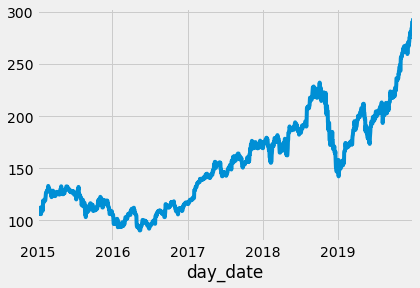

In [3149]:
#stock prices over time
APPL_df.set_index('day_date')['close_value'].plot()

In [3150]:
APPL_df.tail()

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value,summarative_score
1821,AAPL,2019-12-27,289.80,36592940,291.12,293.97,288.12,0.115701
1822,AAPL,2019-12-28,289.80,36592940,291.12,293.97,288.12,0.411740
1823,AAPL,2019-12-29,289.80,36592940,291.12,293.97,288.12,2.102808
1824,AAPL,2019-12-30,291.52,36059610,289.46,292.69,285.22,7.807207
1825,AAPL,2019-12-31,293.65,25247630,289.93,293.68,289.52,1.383618


# # LSTM MODEL: 

In [3151]:
pip install keras

In [3152]:
#here we will do the LSTM model

#/-\|/-\|
import math
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
#from keras.models import Sequential
#from keras.layers import CuDNNLSTM, Dense, Dropout, LSTM
#from keras.layers import Dense, LSTM

#from keras.optimizers import Adam

plt.style.use('fivethirtyeight')


In [3153]:
#Scale Features: https://towardsdatascience.com/what-and-why-behind-fit-transform-vs-transform-in-scikit-learn-78f915cf96fe
#scaler = MinMaxScaler(feature_range = (0,1))
#x_train = scaler.fit_transform(x_train)

#print(x_train)


In [3154]:
APPL_df = APPL_df.fillna(0)
APPL_df.pop('ticker_symbol')



0       AAPL
1       AAPL
2       AAPL
3       AAPL
4       AAPL
        ... 
1821    AAPL
1822    AAPL
1823    AAPL
1824    AAPL
1825    AAPL
Name: ticker_symbol, Length: 1826, dtype: object

In [3155]:
APPL_df = APPL_df.drop(['day_date'], axis=1)

In [3156]:

APPL = APPL_df


In [3157]:
APPL_df

,close_value,volume,open_value,high_value,low_value,summarative_score
0,110.38,41304780,112.82,113.13,110.21,3.911989
1,109.33,53143770,111.39,111.44,107.35,2.044350
2,109.33,53143770,111.39,111.44,107.35,0.000000
3,109.33,53143770,111.39,111.44,107.35,1.740136
4,106.25,64210880,108.29,108.65,105.41,0.866415
...,...,...,...,...,...,...
1821,289.80,36592940,291.12,293.97,288.12,0.115701
1822,289.80,36592940,291.12,293.97,288.12,0.411740
1823,289.80,36592940,291.12,293.97,288.12,2.102808
1824,291.52,36059610,289.46,292.69,285.22,7.807207


In [3158]:
scaler = MinMaxScaler()
APPL_df = scaler.fit_transform(APPL_df)



#print(x_test)


In [3159]:
APPL_df

array([[0.09856869, 0.19892799, 0.1134646 , 0.10608008, 0.10367408,
        0.42322331],
       [0.09340416, 0.27758168, 0.10635442, 0.09772615, 0.08937766,
        0.37159088],
       [0.09340416, 0.27758168, 0.10635442, 0.09772615, 0.08937766,
        0.31507312],
       ...,
       [0.9810634 , 0.16762433, 1.        , 1.        , 0.99300175,
        0.373207  ],
       [0.98952339, 0.16408109, 0.99174622, 0.99367276, 0.97850537,
        0.53090985],
       [1.        , 0.09225046, 0.99408313, 0.99856649, 1.        ,
        0.35332439]])

In [3160]:
X=APPL_df
y=APPL_df[:, 0]

In [3161]:
#Split Train and Test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=123, shuffle = False, stratify=None)

#APPL_train, APPL_test = train_test_split(APPL_df, test_size = 0.2, random_state=123, shuffle = False)




#x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1]))


#print(x_train.shape)
#print(y_train.shape)



In [3162]:
#APPL_train, APPL_test= np.split(APPL_df, [int(.60 *1826)])

In [3163]:
#forecast_out= 3
#x1 = APPL_df.iloc[: , 3:]
#APPL_df['PrevNClose'] = APPL_df[['close_value']].shift(forecast_out)
#x3 = APPL_df['PrevNClose']
#print(x3.shape)
#print(x3)


#X = pd.concat([x1, x3] , axis = 1)
#X.pop("close_value")
#X.pop("summarative_score")
#X = X.drop(labels = None, axis = 0, index = 'close_value')
#X= X[forecast_out:]
#y_train = APPL_train[:, -1]
#y_test = APPL_test[:, -1]
#x_train = APPL_train[:, 0:-1]
#x_test = APPL_test[:, -1]
#


#print(X.shape)
print(x_train)
print(y_train)
#y = APPL_df[['close_value']]
#y = y[forecast_out:]
#print(y)

[[0.09856869 0.19892799 0.1134646  0.10608008 0.10367408 0.42322331]
 [0.09340416 0.27758168 0.10635442 0.09772615 0.08937766 0.37159088]
 [0.09340416 0.27758168 0.10635442 0.09772615 0.08937766 0.31507312]
 ...
 [0.46613546 0.07433947 0.47876889 0.47217004 0.46708323 0.32624953]
 [0.46613546 0.07433947 0.47876889 0.47217004 0.46708323 0.32395324]
 [0.46613546 0.07433947 0.47876889 0.47217004 0.46708323 0.31507312]]
[0.09856869 0.09340416 0.09340416 ... 0.46613546 0.46613546 0.46613546]


In [3164]:
type(x_train)

numpy.ndarray

In [3165]:
#x_train = x_train.to_numpy()
#x_test = x_test.to_numpy()

#y_train = y_train.to_numpy()
#y_test = y_test.to_numpy()

In [3166]:
x_train.shape

(1278, 6)

In [3167]:
x_test.shape

(548, 6)

In [3168]:
y_train.shape

(1278,)

In [3169]:
#print(x_train.count)

In [3170]:
from keras.preprocessing.sequence import TimeseriesGenerator
window_length = 7
batch_size = 32
num_features = 6

#TimeseriesGenerator(x_train, y_train, length=window_length, sampling_rate=1, batch_size=batch_size)[0]

In [3171]:
train_generator = TimeseriesGenerator(x_train, y_train,
                                      length=window_length,
                                      sampling_rate=1,
                                      batch_size=batch_size)

test_generator = TimeseriesGenerator(x_test, y_test,
                                     length=window_length,
                                     sampling_rate=1,
                                     batch_size=batch_size)

In [3172]:
train_generator[0]

(array([[[0.09856869, 0.19892799, 0.1134646 , 0.10608008, 0.10367408,
          0.42322331],
         [0.09340416, 0.27758168, 0.10635442, 0.09772615, 0.08937766,
          0.37159088],
         [0.09340416, 0.27758168, 0.10635442, 0.09772615, 0.08937766,
          0.31507312],
         ...,
         [0.07825488, 0.35110731, 0.09094073, 0.08393475, 0.07968008,
          0.33902589],
         [0.07830407, 0.36088252, 0.08223946, 0.0779041 , 0.07578105,
          0.31507312],
         [0.08563278, 0.19014891, 0.08552108, 0.08171033, 0.08610347,
          0.31174987]],
 
        [[0.09340416, 0.27758168, 0.10635442, 0.09772615, 0.08937766,
          0.37159088],
         [0.09340416, 0.27758168, 0.10635442, 0.09772615, 0.08937766,
          0.31507312],
         [0.09340416, 0.27758168, 0.10635442, 0.09772615, 0.08937766,
          0.36318063],
         ...,
         [0.07830407, 0.36088252, 0.08223946, 0.0779041 , 0.07578105,
          0.31507312],
         [0.08563278, 0.19014891, 0.085

In [3173]:
from tensorflow.keras import regularizers
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(165,
                               input_shape= (window_length, num_features),
                               
                               return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.3))
#model.add(tf.keras.layers.Dropout(0.4)) 
model.add(tf.keras.layers.LSTM(100, return_sequences=True))
#model.add(tf.keras.layers.LeakyReLU(alpha=0.3))
model.add(tf.keras.layers.LSTM(70, return_sequences=False))
#model.add(tf.keras.layers.LeakyReLU(alpha=0.3))
model.add(tf.keras.layers.Dense(1))


#activity_regularizer=regularizers.L2(0.3),
#model.compile(optimizer='adam', loss='mse')



In [3174]:
model.summary()

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_88 (LSTM)               (None, 7, 165)            113520    
_________________________________________________________________
leaky_re_lu_51 (LeakyReLU)   (None, 7, 165)            0         
_________________________________________________________________
lstm_89 (LSTM)               (None, 7, 100)            106400    
_________________________________________________________________
lstm_90 (LSTM)               (None, 70)                47880     
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 71        
Total params: 267,871
Trainable params: 267,871
Non-trainable params: 0
_________________________________________________________________


In [3175]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, mode='min')

model.compile(loss=tf.losses.MeanSquaredError(),
              optimizer=tf.optimizers.Adam(),
              metrics=[tf.metrics.MeanAbsoluteError()])



In [3176]:
#import joblib

#joblib_file = "joblib_model.sav"


In [3177]:
import os
def fit_max(trials):
    jmin = 100
    last_saved = 0
    for x in range(trials):
        
        history = model.fit(train_generator, epochs=150,
                            validation_data=test_generator,
                            shuffle=False,
                            callbacks=[early_stopping])
        j = min(history.history["val_mean_absolute_error"])
        
        #plot graph
        
        plt.plot(history.history["loss"])
        plt.plot(history.history["val_loss"])
        plt.title("model loss")
        plt.ylabel("loss")
        plt.xlabel("epoch")
        plt.legend(["train", "val"], loc="upper left")
        plt.show()
        #
        
        
        if (jmin > j):
            jmin = j
            
            print('so far best: ', jmin)

            model_json = model.to_json()
            with open("model.json", "w") as json_file:
                json_file.write(model_json)
            model.save_weights("model.h5")
            print("Saved model to disk")
            last_saved = x
            # Save to file in the current working directory
            
            history_best = history
        print('~~~~~~~~~~~~~~~~~~~~ ', x , ' ~~~~~~~~~~~~~~~~~~~~')
        
    print('loss: ', jmin )
    print('best trial: ', last_saved )

Epoch 1/150
40/40 [==============================] - 20s 111ms/step - loss: 0.0108 - mean_absolute_error: 0.0876 - val_loss: 0.0359 - val_mean_absolute_error: 0.1607
Epoch 2/150
40/40 [==============================] - 1s 33ms/step - loss: 0.0074 - mean_absolute_error: 0.0718 - val_loss: 0.0126 - val_mean_absolute_error: 0.0843
Epoch 3/150
40/40 [==============================] - 1s 33ms/step - loss: 0.0110 - mean_absolute_error: 0.0861 - val_loss: 0.0089 - val_mean_absolute_error: 0.0740
Epoch 4/150
40/40 [==============================] - 1s 33ms/step - loss: 0.0114 - mean_absolute_error: 0.0887 - val_loss: 0.0116 - val_mean_absolute_error: 0.0860
Epoch 5/150
40/40 [==============================] - 1s 34ms/step - loss: 0.0135 - mean_absolute_error: 0.0982 - val_loss: 0.0118 - val_mean_absolute_error: 0.0800
Epoch 6/150
40/40 [==============================] - 1s 33ms/step - loss: 0.0094 - mean_absolute_error: 0.0788 - val_loss: 0.0074 - val_mean_absolute_error: 0.0642
Epoch 7/150
40

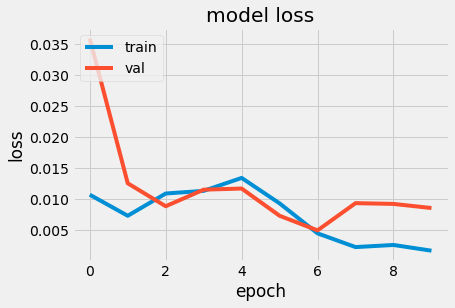

so far best:  0.049507152289152145
Saved model to disk
~~~~~~~~~~~~~~~~~~~~  0  ~~~~~~~~~~~~~~~~~~~~
Epoch 1/150
40/40 [==============================] - 1s 33ms/step - loss: 0.0020 - mean_absolute_error: 0.0357 - val_loss: 0.0066 - val_mean_absolute_error: 0.0565
Epoch 2/150
40/40 [==============================] - 1s 34ms/step - loss: 0.0024 - mean_absolute_error: 0.0372 - val_loss: 0.0066 - val_mean_absolute_error: 0.0549
Epoch 3/150
40/40 [==============================] - 1s 34ms/step - loss: 0.0043 - mean_absolute_error: 0.0477 - val_loss: 0.0073 - val_mean_absolute_error: 0.0559
Epoch 4/150
40/40 [==============================] - 1s 33ms/step - loss: 0.0073 - mean_absolute_error: 0.0601 - val_loss: 0.0246 - val_mean_absolute_error: 0.1364
Epoch 5/150
40/40 [==============================] - 1s 34ms/step - loss: 0.0035 - mean_absolute_error: 0.0446 - val_loss: 0.0133 - val_mean_absolute_error: 0.0921


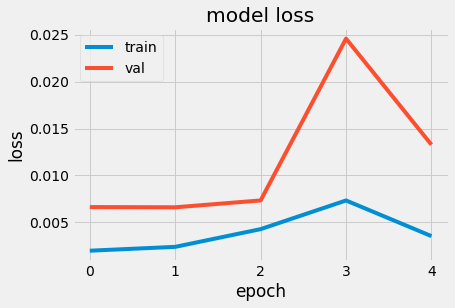

~~~~~~~~~~~~~~~~~~~~  1  ~~~~~~~~~~~~~~~~~~~~
Epoch 1/150
40/40 [==============================] - 1s 35ms/step - loss: 0.0020 - mean_absolute_error: 0.0370 - val_loss: 0.0113 - val_mean_absolute_error: 0.0822
Epoch 2/150
40/40 [==============================] - 1s 34ms/step - loss: 0.0012 - mean_absolute_error: 0.0287 - val_loss: 0.0102 - val_mean_absolute_error: 0.0724
Epoch 3/150
40/40 [==============================] - 1s 34ms/step - loss: 6.1441e-04 - mean_absolute_error: 0.0198 - val_loss: 0.0096 - val_mean_absolute_error: 0.0664
Epoch 4/150
40/40 [==============================] - 1s 33ms/step - loss: 4.6281e-04 - mean_absolute_error: 0.0164 - val_loss: 0.0103 - val_mean_absolute_error: 0.0692
Epoch 5/150
40/40 [==============================] - 1s 33ms/step - loss: 4.7889e-04 - mean_absolute_error: 0.0167 - val_loss: 0.0107 - val_mean_absolute_error: 0.0720
Epoch 6/150
40/40 [==============================] - 1s 33ms/step - loss: 5.0635e-04 - mean_absolute_error: 0.0172 - val_l

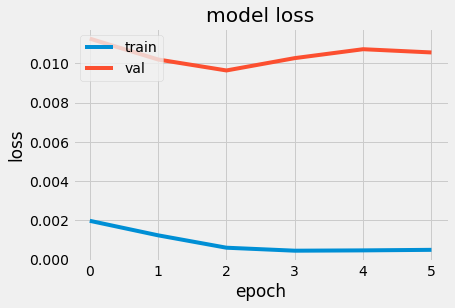

~~~~~~~~~~~~~~~~~~~~  2  ~~~~~~~~~~~~~~~~~~~~
Epoch 1/150
40/40 [==============================] - 1s 36ms/step - loss: 4.8384e-04 - mean_absolute_error: 0.0167 - val_loss: 0.0099 - val_mean_absolute_error: 0.0698
Epoch 2/150
40/40 [==============================] - 1s 33ms/step - loss: 4.2647e-04 - mean_absolute_error: 0.0155 - val_loss: 0.0092 - val_mean_absolute_error: 0.0667
Epoch 3/150
40/40 [==============================] - 1s 34ms/step - loss: 3.9738e-04 - mean_absolute_error: 0.0149 - val_loss: 0.0087 - val_mean_absolute_error: 0.0643
Epoch 4/150
40/40 [==============================] - 1s 33ms/step - loss: 4.0988e-04 - mean_absolute_error: 0.0153 - val_loss: 0.0085 - val_mean_absolute_error: 0.0631
Epoch 5/150
40/40 [==============================] - 1s 34ms/step - loss: 4.2508e-04 - mean_absolute_error: 0.0156 - val_loss: 0.0086 - val_mean_absolute_error: 0.0630
Epoch 6/150
40/40 [==============================] - 1s 34ms/step - loss: 4.1235e-04 - mean_absolute_error: 0.0152

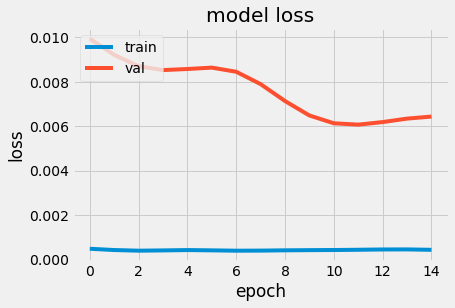

~~~~~~~~~~~~~~~~~~~~  3  ~~~~~~~~~~~~~~~~~~~~
Epoch 1/150
40/40 [==============================] - 1s 35ms/step - loss: 3.9952e-04 - mean_absolute_error: 0.0151 - val_loss: 0.0064 - val_mean_absolute_error: 0.0542
Epoch 2/150
40/40 [==============================] - 1s 34ms/step - loss: 3.6341e-04 - mean_absolute_error: 0.0143 - val_loss: 0.0062 - val_mean_absolute_error: 0.0529
Epoch 3/150
40/40 [==============================] - 1s 34ms/step - loss: 3.4025e-04 - mean_absolute_error: 0.0137 - val_loss: 0.0058 - val_mean_absolute_error: 0.0509
Epoch 4/150
40/40 [==============================] - 1s 33ms/step - loss: 3.3271e-04 - mean_absolute_error: 0.0136 - val_loss: 0.0054 - val_mean_absolute_error: 0.0484
Epoch 5/150
40/40 [==============================] - 1s 34ms/step - loss: 3.3815e-04 - mean_absolute_error: 0.0137 - val_loss: 0.0049 - val_mean_absolute_error: 0.0460
Epoch 6/150
40/40 [==============================] - 1s 33ms/step - loss: 3.5201e-04 - mean_absolute_error: 0.0140

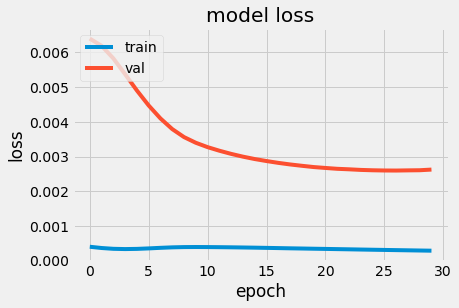

so far best:  0.033207375556230545
Saved model to disk
~~~~~~~~~~~~~~~~~~~~  4  ~~~~~~~~~~~~~~~~~~~~
Epoch 1/150
40/40 [==============================] - 1s 35ms/step - loss: 2.8002e-04 - mean_absolute_error: 0.0126 - val_loss: 0.0026 - val_mean_absolute_error: 0.0333
Epoch 2/150
40/40 [==============================] - 1s 34ms/step - loss: 2.7515e-04 - mean_absolute_error: 0.0124 - val_loss: 0.0027 - val_mean_absolute_error: 0.0334
Epoch 3/150
40/40 [==============================] - 1s 33ms/step - loss: 2.7058e-04 - mean_absolute_error: 0.0123 - val_loss: 0.0027 - val_mean_absolute_error: 0.0336
Epoch 4/150
40/40 [==============================] - 1s 33ms/step - loss: 2.6595e-04 - mean_absolute_error: 0.0122 - val_loss: 0.0027 - val_mean_absolute_error: 0.0337


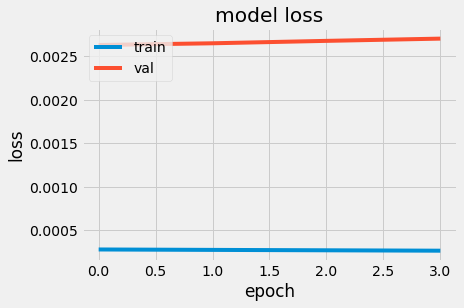

~~~~~~~~~~~~~~~~~~~~  5  ~~~~~~~~~~~~~~~~~~~~
Epoch 1/150
40/40 [==============================] - 1s 35ms/step - loss: 2.6165e-04 - mean_absolute_error: 0.0121 - val_loss: 0.0027 - val_mean_absolute_error: 0.0339
Epoch 2/150
40/40 [==============================] - 1s 34ms/step - loss: 2.5782e-04 - mean_absolute_error: 0.0121 - val_loss: 0.0028 - val_mean_absolute_error: 0.0342
Epoch 3/150
40/40 [==============================] - 1s 34ms/step - loss: 2.5420e-04 - mean_absolute_error: 0.0120 - val_loss: 0.0028 - val_mean_absolute_error: 0.0344
Epoch 4/150
40/40 [==============================] - 1s 31ms/step - loss: 2.5083e-04 - mean_absolute_error: 0.0119 - val_loss: 0.0029 - val_mean_absolute_error: 0.0347


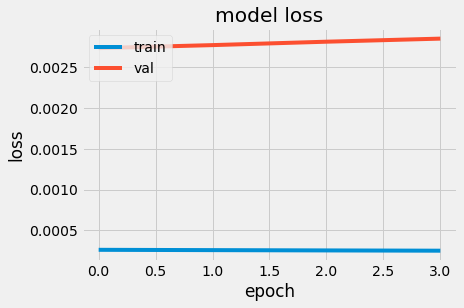

~~~~~~~~~~~~~~~~~~~~  6  ~~~~~~~~~~~~~~~~~~~~
Epoch 1/150
40/40 [==============================] - 1s 35ms/step - loss: 2.4765e-04 - mean_absolute_error: 0.0119 - val_loss: 0.0029 - val_mean_absolute_error: 0.0348
Epoch 2/150
40/40 [==============================] - 1s 34ms/step - loss: 2.4439e-04 - mean_absolute_error: 0.0118 - val_loss: 0.0029 - val_mean_absolute_error: 0.0350
Epoch 3/150
40/40 [==============================] - 1s 33ms/step - loss: 2.4185e-04 - mean_absolute_error: 0.0117 - val_loss: 0.0030 - val_mean_absolute_error: 0.0353
Epoch 4/150
40/40 [==============================] - 1s 34ms/step - loss: 2.3953e-04 - mean_absolute_error: 0.0117 - val_loss: 0.0030 - val_mean_absolute_error: 0.0357


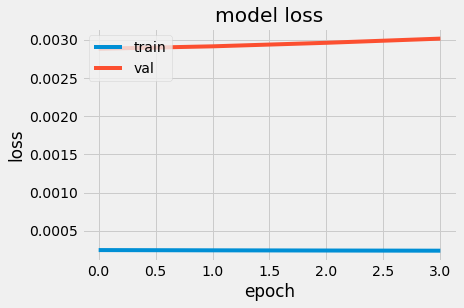

~~~~~~~~~~~~~~~~~~~~  7  ~~~~~~~~~~~~~~~~~~~~
Epoch 1/150
40/40 [==============================] - 1s 35ms/step - loss: 2.3823e-04 - mean_absolute_error: 0.0117 - val_loss: 0.0031 - val_mean_absolute_error: 0.0360
Epoch 2/150
40/40 [==============================] - 1s 34ms/step - loss: 2.3514e-04 - mean_absolute_error: 0.0116 - val_loss: 0.0031 - val_mean_absolute_error: 0.0364
Epoch 3/150
40/40 [==============================] - 1s 34ms/step - loss: 2.3643e-04 - mean_absolute_error: 0.0117 - val_loss: 0.0032 - val_mean_absolute_error: 0.0367
Epoch 4/150
40/40 [==============================] - 1s 34ms/step - loss: 2.3176e-04 - mean_absolute_error: 0.0116 - val_loss: 0.0033 - val_mean_absolute_error: 0.0373


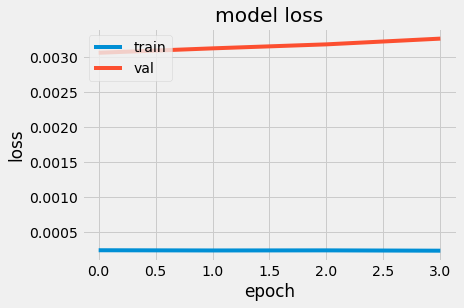

~~~~~~~~~~~~~~~~~~~~  8  ~~~~~~~~~~~~~~~~~~~~
Epoch 1/150
40/40 [==============================] - 1s 35ms/step - loss: 2.3700e-04 - mean_absolute_error: 0.0117 - val_loss: 0.0033 - val_mean_absolute_error: 0.0377
Epoch 2/150
40/40 [==============================] - 1s 33ms/step - loss: 2.2882e-04 - mean_absolute_error: 0.0115 - val_loss: 0.0034 - val_mean_absolute_error: 0.0383
Epoch 3/150
40/40 [==============================] - 1s 34ms/step - loss: 2.3917e-04 - mean_absolute_error: 0.0118 - val_loss: 0.0035 - val_mean_absolute_error: 0.0387
Epoch 4/150
40/40 [==============================] - 1s 34ms/step - loss: 2.2717e-04 - mean_absolute_error: 0.0115 - val_loss: 0.0036 - val_mean_absolute_error: 0.0392


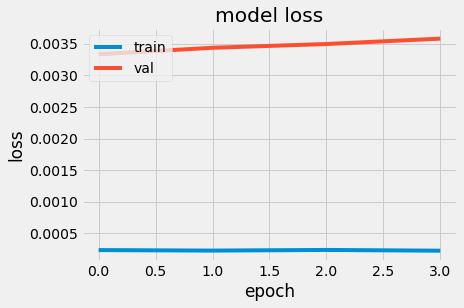

~~~~~~~~~~~~~~~~~~~~  9  ~~~~~~~~~~~~~~~~~~~~
Epoch 1/150
40/40 [==============================] - 1s 35ms/step - loss: 2.3755e-04 - mean_absolute_error: 0.0118 - val_loss: 0.0036 - val_mean_absolute_error: 0.0395
Epoch 2/150
40/40 [==============================] - 1s 34ms/step - loss: 2.2323e-04 - mean_absolute_error: 0.0114 - val_loss: 0.0037 - val_mean_absolute_error: 0.0400
Epoch 3/150
40/40 [==============================] - 1s 34ms/step - loss: 2.2636e-04 - mean_absolute_error: 0.0115 - val_loss: 0.0038 - val_mean_absolute_error: 0.0404
Epoch 4/150
40/40 [==============================] - 1s 34ms/step - loss: 2.0575e-04 - mean_absolute_error: 0.0109 - val_loss: 0.0038 - val_mean_absolute_error: 0.0406


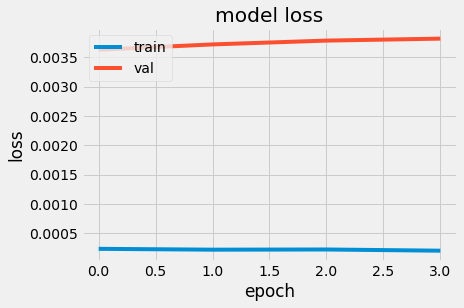

~~~~~~~~~~~~~~~~~~~~  10  ~~~~~~~~~~~~~~~~~~~~
Epoch 1/150
40/40 [==============================] - 1s 35ms/step - loss: 2.0349e-04 - mean_absolute_error: 0.0108 - val_loss: 0.0038 - val_mean_absolute_error: 0.0407
Epoch 2/150
40/40 [==============================] - 1s 34ms/step - loss: 1.8504e-04 - mean_absolute_error: 0.0101 - val_loss: 0.0037 - val_mean_absolute_error: 0.0397
Epoch 3/150
40/40 [==============================] - 1s 34ms/step - loss: 1.8160e-04 - mean_absolute_error: 0.0100 - val_loss: 0.0033 - val_mean_absolute_error: 0.0372
Epoch 4/150
40/40 [==============================] - 1s 30ms/step - loss: 1.7857e-04 - mean_absolute_error: 0.0099 - val_loss: 0.0027 - val_mean_absolute_error: 0.0333
Epoch 5/150
40/40 [==============================] - 1s 33ms/step - loss: 1.8863e-04 - mean_absolute_error: 0.0103 - val_loss: 0.0023 - val_mean_absolute_error: 0.0311
Epoch 6/150
40/40 [==============================] - 1s 33ms/step - loss: 2.0460e-04 - mean_absolute_error: 0.010

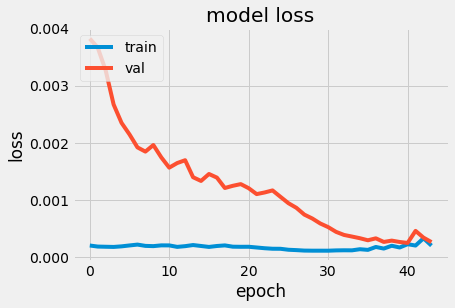

so far best:  0.010919461026787758
Saved model to disk
~~~~~~~~~~~~~~~~~~~~  11  ~~~~~~~~~~~~~~~~~~~~
Epoch 1/150
40/40 [==============================] - 1s 35ms/step - loss: 4.4413e-04 - mean_absolute_error: 0.0168 - val_loss: 7.0175e-04 - val_mean_absolute_error: 0.0219
Epoch 2/150
40/40 [==============================] - 1s 34ms/step - loss: 2.5161e-04 - mean_absolute_error: 0.0126 - val_loss: 8.8021e-04 - val_mean_absolute_error: 0.0246
Epoch 3/150
40/40 [==============================] - 1s 34ms/step - loss: 6.3255e-04 - mean_absolute_error: 0.0207 - val_loss: 0.0013 - val_mean_absolute_error: 0.0269
Epoch 4/150
40/40 [==============================] - 1s 32ms/step - loss: 2.7205e-04 - mean_absolute_error: 0.0128 - val_loss: 0.0014 - val_mean_absolute_error: 0.0310


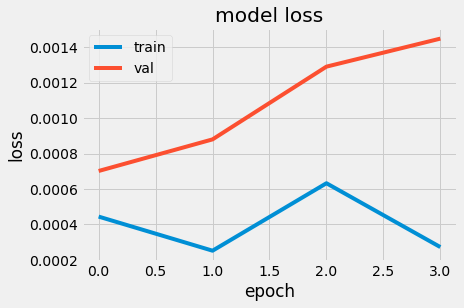

~~~~~~~~~~~~~~~~~~~~  12  ~~~~~~~~~~~~~~~~~~~~
Epoch 1/150
40/40 [==============================] - 1s 35ms/step - loss: 6.8659e-04 - mean_absolute_error: 0.0216 - val_loss: 0.0040 - val_mean_absolute_error: 0.0502
Epoch 2/150
40/40 [==============================] - 1s 34ms/step - loss: 4.8881e-04 - mean_absolute_error: 0.0171 - val_loss: 0.0026 - val_mean_absolute_error: 0.0354
Epoch 3/150
40/40 [==============================] - 1s 34ms/step - loss: 8.7241e-04 - mean_absolute_error: 0.0250 - val_loss: 0.0037 - val_mean_absolute_error: 0.0428
Epoch 4/150
40/40 [==============================] - 1s 33ms/step - loss: 7.8352e-04 - mean_absolute_error: 0.0224 - val_loss: 0.0049 - val_mean_absolute_error: 0.0491
Epoch 5/150
40/40 [==============================] - 1s 34ms/step - loss: 0.0011 - mean_absolute_error: 0.0258 - val_loss: 0.0057 - val_mean_absolute_error: 0.0529


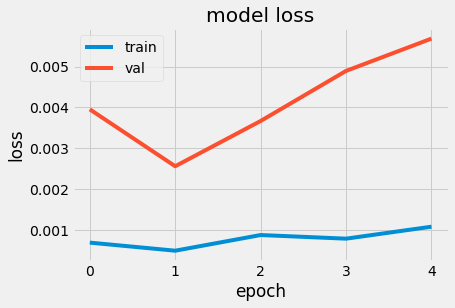

~~~~~~~~~~~~~~~~~~~~  13  ~~~~~~~~~~~~~~~~~~~~
Epoch 1/150
40/40 [==============================] - 1s 36ms/step - loss: 8.4577e-04 - mean_absolute_error: 0.0223 - val_loss: 0.0060 - val_mean_absolute_error: 0.0543
Epoch 2/150
40/40 [==============================] - 1s 33ms/step - loss: 9.4982e-04 - mean_absolute_error: 0.0236 - val_loss: 0.0048 - val_mean_absolute_error: 0.0481
Epoch 3/150
40/40 [==============================] - 1s 33ms/step - loss: 8.0980e-04 - mean_absolute_error: 0.0224 - val_loss: 0.0042 - val_mean_absolute_error: 0.0433
Epoch 4/150
40/40 [==============================] - 1s 34ms/step - loss: 6.0431e-04 - mean_absolute_error: 0.0196 - val_loss: 0.0028 - val_mean_absolute_error: 0.0341
Epoch 5/150
40/40 [==============================] - 1s 34ms/step - loss: 2.6516e-04 - mean_absolute_error: 0.0126 - val_loss: 0.0030 - val_mean_absolute_error: 0.0383
Epoch 6/150
40/40 [==============================] - 1s 34ms/step - loss: 4.7087e-04 - mean_absolute_error: 0.017

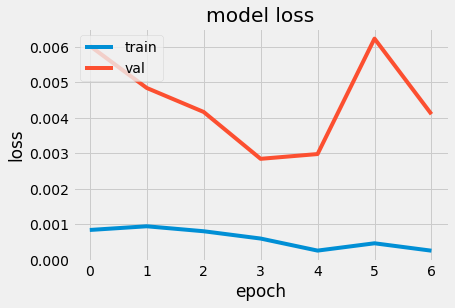

~~~~~~~~~~~~~~~~~~~~  14  ~~~~~~~~~~~~~~~~~~~~
loss:  0.010919461026787758
best trial:  11


In [3178]:
fit_max(15)

In [3179]:
from keras.models import model_from_json
with open('model.json','r') as f:
    json = f.read()
model = model_from_json(json)

model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [3180]:

model.compile(loss=tf.losses.MeanSquaredError(),
              optimizer=tf.optimizers.Adam(),
              metrics=[tf.metrics.MeanAbsoluteError()])

In [3181]:
#min(history_best.history["val_mean_absolute_error"])

In [3182]:
model.evaluate(test_generator, verbose=0)  

[0.0002629901864565909, 0.011709925718605518]

In [3183]:
predictions=model.predict(test_generator)

In [3184]:
y_test.shape[0] - window_length


541

In [3185]:
predictions[0]

array([0.47460926], dtype=float32)

In [3186]:
predictions[1]

array([0.48842725], dtype=float32)

In [3187]:
predictions.shape

(541, 1)

In [3188]:
x_test[:,0:-1][window_length:]


array([[0.49304018, 0.05497153, 0.49472951, 0.48942165, 0.49902524],
       [0.49190891, 0.02949314, 0.50074582, 0.49238754, 0.50342464],
       [0.47975997, 0.04925802, 0.48975736, 0.48497232, 0.49057736],
       ...,
       [0.9810634 , 0.16762433, 1.        , 1.        , 0.99300175],
       [0.98952339, 0.16408109, 0.99174622, 0.99367276, 0.97850537],
       [1.        , 0.09225046, 0.99408313, 0.99856649, 1.        ]])

In [3189]:
df_pred=pd.concat([pd.DataFrame(predictions), pd.DataFrame(x_test[:,1:][window_length:]),]
                  ,axis=1)


In [3190]:
df_pred

,0,0,1,2,3,4
0,0.474609,0.054972,0.494730,0.489422,0.499025,0.386826
1,0.488427,0.029493,0.500746,0.492388,0.503425,0.331450
2,0.492005,0.049258,0.489757,0.484972,0.490577,0.304424
3,0.480698,0.044101,0.494879,0.493030,0.499075,0.334536
4,0.488800,0.007605,0.502586,0.495156,0.507023,0.332162
...,...,...,...,...,...,...
536,0.953675,0.167624,1.000000,1.000000,0.993002,0.318272
537,0.969364,0.167624,1.000000,1.000000,0.993002,0.326456
538,0.965160,0.167624,1.000000,1.000000,0.993002,0.373207
539,0.963535,0.164081,0.991746,0.993673,0.978505,0.530910


In [3191]:
rev_trans=scaler.inverse_transform(df_pred)


In [3192]:
rev_trans

array([[ 1.86832808e+02,  1.96363900e+07,  1.89500000e+02,
         1.90680000e+02,  1.89300000e+02,  2.59542100e+00],
       [ 1.89642145e+02,  1.58013700e+07,  1.90710000e+02,
         1.91280000e+02,  1.90180100e+02,  5.92368000e-01],
       [ 1.90369498e+02,  1.87763900e+07,  1.88500000e+02,
         1.89779900e+02,  1.87610000e+02, -3.85190000e-01],
       ...,
       [ 2.86566718e+02,  3.65929400e+07,  2.91120000e+02,
         2.93970000e+02,  2.88120000e+02,  2.10280800e+00],
       [ 2.86236255e+02,  3.60596100e+07,  2.89460000e+02,
         2.92690000e+02,  2.85220000e+02,  7.80720700e+00],
       [ 2.86168223e+02,  2.52476300e+07,  2.89930000e+02,
         2.93680000e+02,  2.89520000e+02,  1.38361800e+00]])

In [3193]:
df_final=APPL[predictions.shape[0]*-1:]

In [3194]:
df_final

,close_value,volume,open_value,high_value,low_value,summarative_score
1285,190.58,19636390,189.50,190.6800,189.3000,2.595421
1286,190.35,15801370,190.71,191.2800,190.1801,0.592368
1287,187.88,18776390,188.50,189.7799,187.6100,-0.385190
1288,191.03,18000180,189.53,191.4100,189.3100,0.704025
1289,191.33,12506830,191.08,191.8400,190.9000,0.618124
...,...,...,...,...,...,...
1821,289.80,36592940,291.12,293.9700,288.1200,0.115701
1822,289.80,36592940,291.12,293.9700,288.1200,0.411740
1823,289.80,36592940,291.12,293.9700,288.1200,2.102808
1824,291.52,36059610,289.46,292.6900,285.2200,7.807207


In [3195]:
df_final.count()

close_value          541
volume               541
open_value           541
high_value           541
low_value            541
summarative_score    541
dtype: int64

In [3196]:
df_final['App_Pred']=rev_trans[:,0]

C:\Users\micha\AppData\Local\Temp/ipykernel_16972/2704095297.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['App_Pred']=rev_trans[:,0]


In [3197]:
df_final

,close_value,volume,open_value,high_value,low_value,summarative_score,App_Pred
1285,190.58,19636390,189.50,190.6800,189.3000,2.595421,186.832808
1286,190.35,15801370,190.71,191.2800,190.1801,0.592368,189.642145
1287,187.88,18776390,188.50,189.7799,187.6100,-0.385190,190.369498
1288,191.03,18000180,189.53,191.4100,189.3100,0.704025,188.070611
1289,191.33,12506830,191.08,191.8400,190.9000,0.618124,189.717980
...,...,...,...,...,...,...,...
1821,289.80,36592940,291.12,293.9700,288.1200,0.115701,284.231671
1822,289.80,36592940,291.12,293.9700,288.1200,0.411740,287.421453
1823,289.80,36592940,291.12,293.9700,288.1200,2.102808,286.566718
1824,291.52,36059610,289.46,292.6900,285.2200,7.807207,286.236255


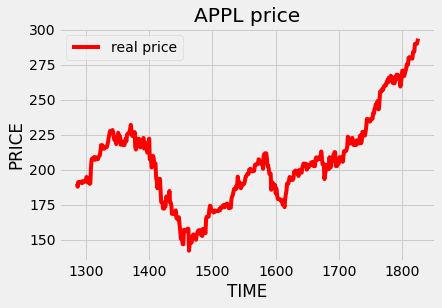

In [3198]:
plt.plot(df_final['close_value'], color = 'red', label = 'real price')
#plt.plot(predictions, color = 'blue', label = 'predicted price')
plt.title('APPL price')
plt.xlabel('TIME')
plt.ylabel('PRICE')
plt.legend()
plt.show()

<AxesSubplot:>

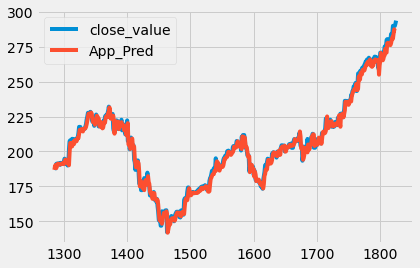

In [3199]:
#amongla sussy baka
df_final[['close_value','App_Pred']].plot()

In [3200]:
from sklearn.metrics import mean_absolute_error

In [3201]:
predic = df_final['App_Pred'].to_numpy()


In [3202]:
val = APPL['close_value'].to_numpy()
val = val[-(predic.size):]
print(val.size)
print(predic.size)

541
541


In [3203]:
y_test

array([0.47631695, 0.46028233, 0.46028233, 0.46756185, 0.48020265,
       0.48020265, 0.48020265, 0.49304018, 0.49190891, 0.47975997,
       0.49525355, 0.49672913, 0.49672913, 0.49672913, 0.49466332,
       0.49731936, 0.49215484, 0.49943436, 0.49727018, 0.49727018,
       0.49727018, 0.49810634, 0.50494319, 0.51389504, 0.51089469,
       0.49500762, 0.49500762, 0.49500762, 0.48974472, 0.49161379,
       0.54675127, 0.5757218 , 0.57867296, 0.57867296, 0.57867296,
       0.58398505, 0.5743446 , 0.5750332 , 0.58305051, 0.57641041,
       0.57641041, 0.57641041, 0.58300133, 0.58732969, 0.58973981,
       0.60488909, 0.62584231, 0.62584231, 0.62584231, 0.61541488,
       0.61334907, 0.61339826, 0.61556244, 0.6188579 , 0.6188579 ,
       0.6188579 , 0.627613  , 0.63626974, 0.65240273, 0.66248586,
       0.67527421, 0.67527421, 0.67527421, 0.67527421, 0.67886479,
       0.67153608, 0.65299297, 0.64413949, 0.64413949, 0.64413949,
       0.62953126, 0.65668191, 0.64300821, 0.66927352, 0.65663

In [3204]:
mae = mean_absolute_error(val, predic)
print(mae)

2.380744931237316


In [3205]:
baseline = pd.DataFrame()

In [3206]:
predic.size

541

In [3207]:
predic.size + 1

542

In [3208]:
baseline['original-excluding-last'] = APPL['close_value'][-(predic.size):-1].to_numpy()

baseline['shifted'] = APPL['close_value'][-(predic.size - 1):].to_numpy()


In [3209]:
baseline

,original-excluding-last,shifted
0,190.58,190.35
1,190.35,187.88
2,187.88,191.03
3,191.03,191.33
4,191.33,191.33
...,...,...
535,289.91,289.80
536,289.80,289.80
537,289.80,289.80
538,289.80,291.52


In [3210]:
mae2 = mean_absolute_error(baseline['original-excluding-last'].to_numpy(), baseline['shifted'].to_numpy())
print(mae2)

1.7790555555555552
